In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)

print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


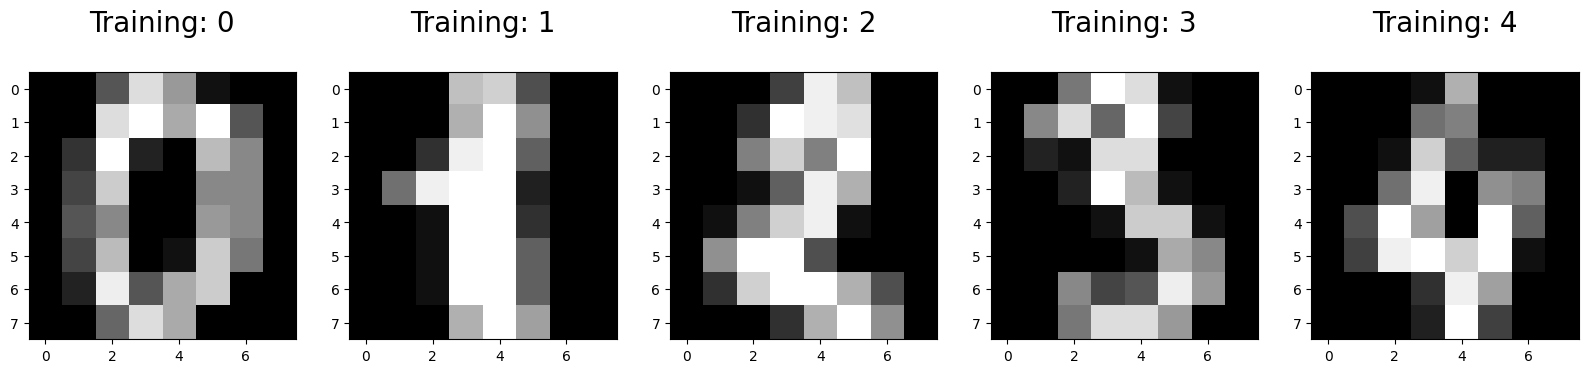

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
  plt.title('Training: %i\n' %label, fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
logisticRegr.predict(x_test[0].reshape(1, -1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [7]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print(score)

0.9511111111111111


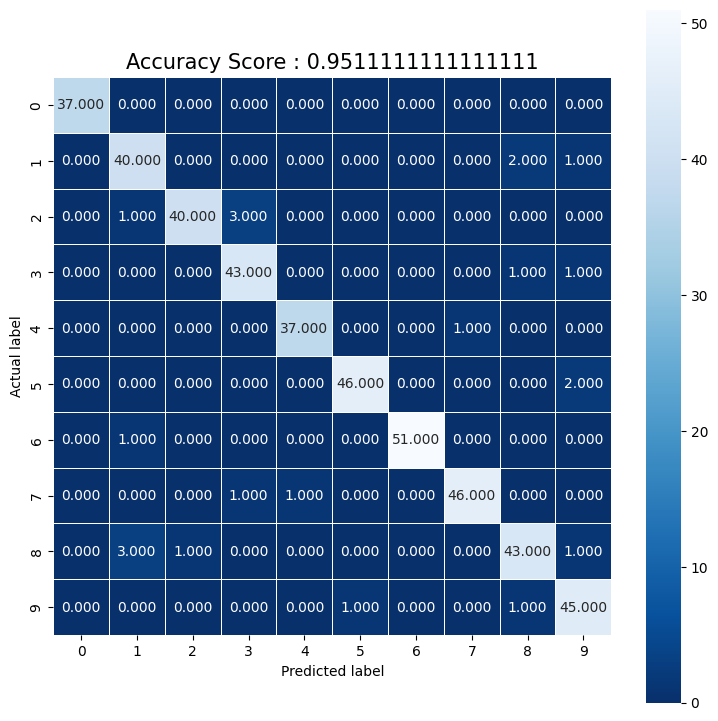

In [9]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (9, 9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [11]:
dataset = pd.read_csv('weather.csv')

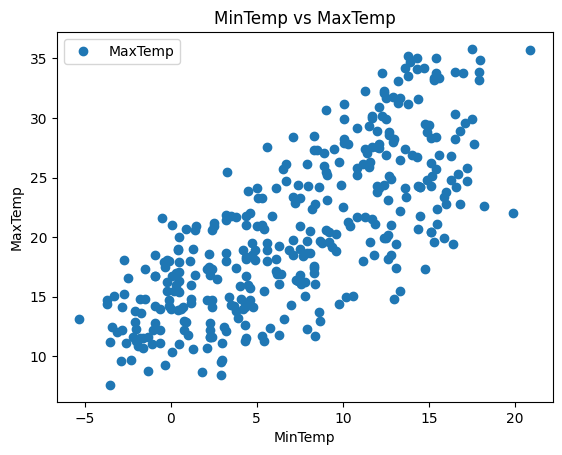

In [12]:
dataset.plot(x='MinTemp', y = 'MaxTemp', style = 'o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [13]:
X = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,22.8,28.525273
1,12.3,13.111560
2,11.1,12.619633
3,15.5,25.655699
4,14.5,15.735171
...,...,...
69,19.6,24.261906
70,11.1,17.210952
71,17.5,14.505354
72,23.3,20.900405


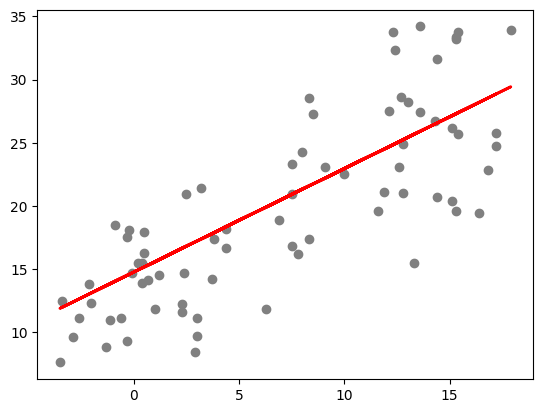

In [16]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [17]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 20.111552748244037
루트 평균제곱법: 4.484590588698598
